### Student Information
Name: Alejandro Cortés

Student ID: 110065429

GitHub ID: alexjcortes18

Kaggle name: alexjcortes

Kaggle private scoreboard snapshot:

![Snapshot](Kaggle_Position.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Jan 7th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Jan 12th 11:59 pm, Wednesday)__. 

# Take Away Exercises

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np

In [2]:
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=30)
count_vectorizer.fit(train_df.text)

train_df_counts = count_vectorizer.fit_transform(train_df.text)
train_feature_names = count_vectorizer.get_feature_names()

#Get again the feature names with the new fit_transform on "test" just in case this one has more counts on another features.
test_df_counts = count_vectorizer.fit_transform(test_df.text)
test_feature_names = count_vectorizer.get_feature_names()

#Get all frequencies for both datasets
term_frequencies_train = np.asarray(train_df_counts.sum(axis=0))
term_frequencies_test = np.asarray(test_df_counts.sum(axis=0))

In [9]:
import plotly.graph_objects as go

# Plot both datasets in the same graph:

trace1 = go.Bar(x = train_feature_names, y = term_frequencies_train.tolist()[0],  name = 'Train', showlegend=True,marker={'color': 'blue'})
trace2 = go.Bar(x = test_feature_names, y = term_frequencies_test.tolist()[0], name = 'Test', showlegend=True,marker={'color': 'green'})

data = [trace1, trace2]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data = data, layout = layout)
fig.show()

#Here we can visualize that the Train and Test datas have 28 max features in common, but each one has 2 unique feature
#names.

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

number_features = 1000

tfidf_vectorizer = TfidfVectorizer(
                            lowercase=True,
                            max_features= number_features, #top 1000 most important features
                            max_df=0.8,
                            #min_df=5,
                            #ngram_range = (1,3),
                            stop_words = "english"
                            )
vectors = tfidf_vectorizer.fit_transform(train_df.text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

tfidf_array = vectors.toarray()
tfidf_df = pd.DataFrame(tfidf_array, columns= tfidf_feature_names)

print("Feature names (100:110): ", tfidf_feature_names[100:110])
tfidf_df.loc[:,tfidf_feature_names[100:110]]

Feature names (100:110):  ['blue', 'blues', 'body', 'boiling', 'book', 'boss', 'bought', 'bout', 'boy', 'break']


,blue,blues,body,boiling,book,boss,bought,bout,boy,break
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3608,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3610,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3611,0.0,0.437695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lab Code:

In [11]:
#lab 2 code needed for Exercise 3, 4, and 5:

In [12]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [13]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [14]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger'], dtype=object)

In [26]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [27]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [28]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [29]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

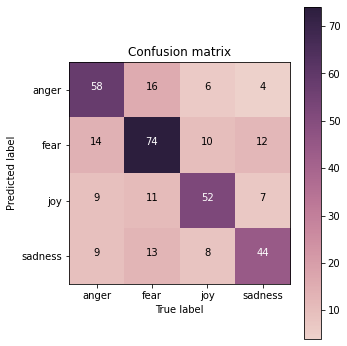

In [22]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [21]:
# Answer here:

# The diagonal from top to bottom and left to right, indicates the True Labels that were predicted correctly: 58 for anger,
# 74 for fear, 52 for joy, 44 for sadness. All the other ones are combinations of true labels that were predicted as
# other emotions and not the correct ones. For example, the one the farthest to the left and in the bottom row, represents
# 9 predictions of "sadness", that in reality were "anger".
# Total misclassifications:
# 16 fear, 6 joy, and 4 sadness misclassified as anger
# 14 anger, 10 joy, and 12 sadness misclassified as fear
# 9 anger, 11 fear, and 7 sadness misclassified as joy
# 9 anger, 13 fear, and 8 joy misclassified as sadness

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [23]:
# Answer here
# Train it with the BoW_500 (previously done)

In [24]:
#Performing the actual Naive Classifier:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train, y_train)

MultinomialNB()

The accuracy for this Naive Classifier is:  69.74 %


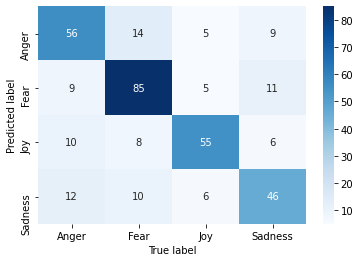

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

predictions = naive_classifier.predict(X_test)

ac = accuracy_score(y_test,predictions)
print('The accuracy for this Naive Classifier is: ', round((ac *100),2), '%' )

#Plot Confusion Matrix Dataframe with actual numbers
cm = confusion_matrix(y_test, predictions) #without normalizing the ("true") rows, to get actual counts
cm_df = pd.DataFrame(cm ,columns = ['Anger', 'Fear', 'Joy', 'Sadness'],)
cm_df = cm_df.rename(index={0:'Anger',1:'Fear',2:'Joy',3:'Sadness'})

sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

#The testing results are as follows:
# True Anger emotions predicted correctly: 56
# True Fear emotions predicted correctly: 85
# True Joy emotions predicted correctly: 55
# True Sadness emotions predicted correctly: 46

# With an Naive Classifier accuracy of: 69.74%

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [57]:
from sklearn.metrics import f1_score
f1_DT = f1_score(y_true=y_test, y_pred=y_test_pred, average='micro')
f1_NB = f1_score(y_true=y_test, y_pred=predictions, average='micro')
print("Decision Tree F1:",f1_DT)
print("Naive Bayes F1:",f1_NB)

Decision Tree F1: 0.6570605187319885
Naive Bayes F1: 0.6974063400576369


In [58]:
# Answer here
# Naive Bayes outperformed Decision Tree in predicting the true labels correctly in 3 of the 4 categories (Fear, Joy, and 
# Sadness).


# 14 fear, 5 joy, and 9 sadness misclassified as anger
# 9 anger, 5 joy, and 11 sadness misclassified as fear
# 10 anger, 8 fear, and 6 sadness misclassified as joy
# 12 anger, 10 fear, and 6 joy misclassified as sadness

#Also as we can see in the F1 calculation, the Naive Bayes performed 4% better than the Decision Tree, so that means its 
#overall precision and recall (both in consideration) were better than DT, so this Naive Bayes minimizes False Positives
#and False Negatives better than the DT model. 

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [30]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.368945,1.325741,0.469741,1.268938
1,1,0.655134,0.982429,0.634006,0.914603
2,2,0.797952,0.582122,0.697406,0.793478
3,3,0.851647,0.412373,0.671470,0.811645
4,4,0.882646,0.326454,0.677233,0.848722
5,5,0.902297,0.273709,0.665706,0.931351
6,6,0.930252,0.219664,0.662824,0.963066
7,7,0.941046,0.184467,0.671470,1.031956
8,8,0.951010,0.157180,0.659942,1.078544
9,9,0.963742,0.131243,0.654179,1.127935


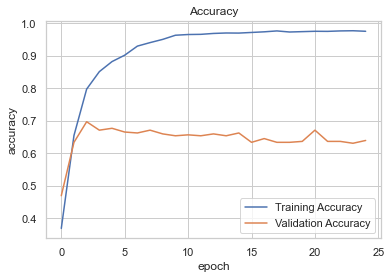

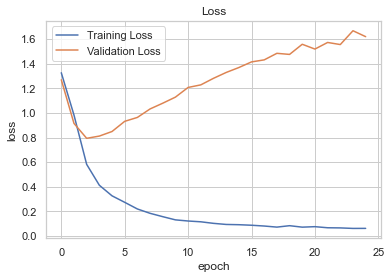

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = training_log.epoch, y = training_log.accuracy, legend=True)
ax = sns.lineplot(x = training_log.epoch, y = training_log.val_accuracy)
ax.set_title('Accuracy')
plt.legend(loc='lower right', labels=['Training Accuracy', 'Validation Accuracy'])
plt.show()

ax2 = sns.lineplot(x = training_log.epoch, y = training_log.loss)
ax2 = sns.lineplot(x = training_log.epoch, y = training_log.val_loss)
plt.legend(loc='upper left', labels=['Training Loss', 'Validation Loss'])
ax2.set_title('Loss')
plt.show()

In [ ]:
# Answer here

# We can definitely state the overfitting is happening in here. This is because as we can appreciate in the Loss graph, 
# the validation loss starts increasing around the 2nd or 3rd epoch, but the training loss continues to decrease. At the same
# time the training accuracy continues to go nearly to 100%, but the validation accuracy which is the one we use for
# comparing our training data doesn't go up 70%. If the validation loss increases, overfitting happens.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [59]:
# Answer here
# Theoretical question.. just answered it; think about how would you go about it, but don't need to implement it.

In [60]:
#Each word in 1 sentence would become a vector with values of similarity to the target word we are trying to compare it too. So
#for example, for a small data like: "The homework is so difficult!", and a target word like task, we would have:
#Task - > [0.09, 0.8, 0.13, 0.04, 0.56] of similarities to the corpus of data, so it is most similar to "homework"
#and to "difficult". After having each Target words transform to a vector of similarities, we can then input them into a 
#neural network.

# Lab #2 code for preparing Exercise 8:

In [46]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
0,10000,How the fu*k! Who the heck! moved my fridge!.....,"[How, the, fu, *, k, !, Who, the, heck, !, mov..."
1,10001,So my Indian Uber driver just called someone t...,"[So, my, Indian, Uber, driver, just, called, s..."
2,10002,@DPD_UK I asked for my parcel to be delivered ...,"[@, DPD_UK, I, asked, for, my, parcel, to, be,..."
3,10003,so ef whichever butt wipe pulled the fire alar...,"[so, ef, whichever, butt, wipe, pulled, the, f..."
4,10004,Don't join @BTCare they put the phone down on ...,"[Do, n't, join, @, BTCare, they, put, the, pho..."


In [47]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['How', 'the', 'fu', '*', 'k', '!', 'Who', 'the', 'heck', '!', 'moved', 'my', 'fridge', '!', '...', 'should', 'I', 'knock', 'the', 'landlord', 'door', '.', '#', 'angry', '#', 'mad', '#', '#']),
       list(['So', 'my', 'Indian', 'Uber', 'driver', 'just', 'called', 'someone', 'the', 'N', 'word', '.', 'If', 'I', 'was', "n't", 'in', 'a', 'moving', 'vehicle', 'I', "'d", 'have', 'jumped', 'out', '#', 'disgusted']),
       list(['@', 'DPD_UK', 'I', 'asked', 'for', 'my', 'parcel', 'to', 'be', 'delivered', 'to', 'a', 'pick', 'up', 'store', 'not', 'my', 'address', '#', 'fuming', '#', 'poorcustomerservice'])],
      dtype=object)

In [48]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

In [49]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
# Answer here

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

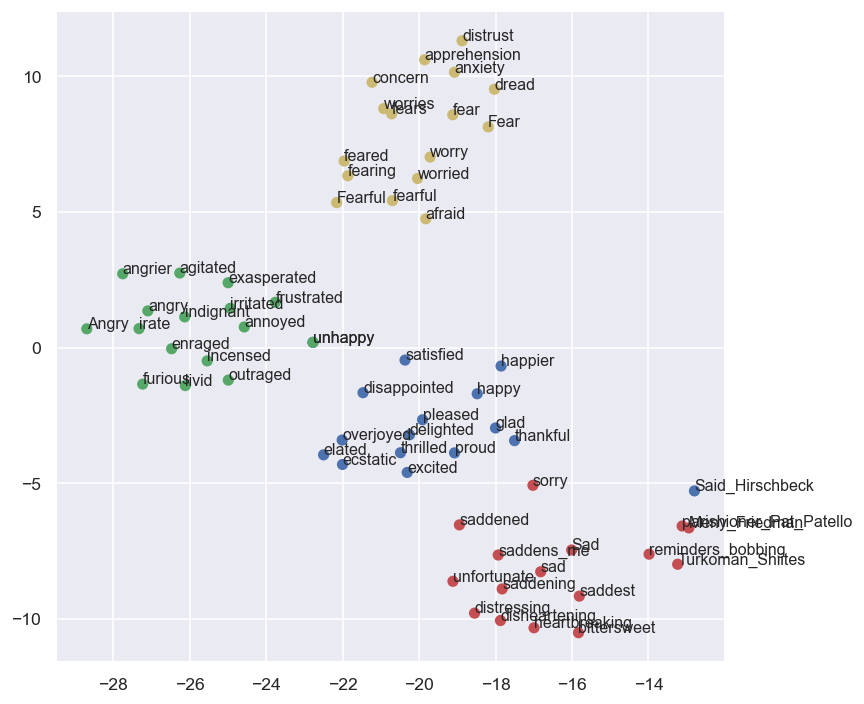

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()